<a href="https://colab.research.google.com/github/Nafeya-123/multiple-projects/blob/main/Code_Liver_Prediction(9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Liver disease /Dataset_liver_patient-Updated(1).csv')
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,32,Male,3.7,1.6,612,50,88,6.2,1.9,0.40,1
1,72,Male,0.7,0.2,185,16,22,7.3,3.7,1.00,2
2,75,Female,0.8,0.2,188,20,29,4.4,1.8,0.60,1
3,21,Male,3.9,1.8,150,36,27,6.8,3.9,1.34,1
4,18,Male,0.6,0.2,538,33,34,7.5,3.2,0.70,1
5,60,Female,1.4,0.7,159,10,12,4.9,2.5,1.00,2
6,40,Male,1.1,0.3,230,1630,960,4.9,2.8,1.30,1
7,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1
8,42,Male,0.8,0.2,127,29,30,4.9,2.7,1.20,1
9,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50,1


Checking For Null values

In [ ]:
data.isnull().sum()

Age                            0
Gender                         0
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protiens                 0
Albumin                        0
Albumin_and_Globulin_Ratio    12
Dataset                        0
dtype: int64

In [ ]:
data[data['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
474,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
541,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
775,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2
791,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
839,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2
886,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
940,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
1260,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
1311,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
1531,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [ ]:
data['Albumin_and_Globulin_Ratio'].describe()

count    1846.000000
mean        0.945087
std         0.317562
min         0.300000
25%         0.700000
50%         0.930000
75%         1.100000
max         2.800000
Name: Albumin_and_Globulin_Ratio, dtype: float64

<Axes: ylabel='Frequency'>

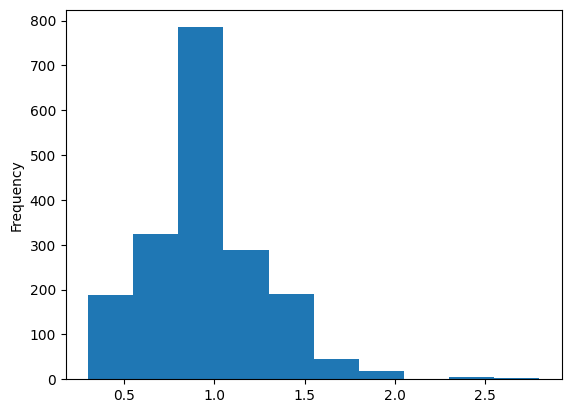

In [ ]:
data['Albumin_and_Globulin_Ratio'].plot.hist()

Here data are normally distrubuted but sightly right skewed.So, we can can go with Mean or Mediam.


In [ ]:
data['Albumin_and_Globulin_Ratio'].median()

0.93

In [ ]:
df = data.copy()

In [ ]:
df['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median(), inplace=True)
df.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Looking for data description

In [ ]:
df.describe(percentiles=[0.3,.5,.8])

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000
mean,44.867600,3.339720,1.507212,289.863832,79.295479,108.488698,6.497255,3.145856,0.944989,1.287944
std,16.150634,6.294076,2.868628,243.088010,177.897475,281.962639,1.082503,0.792368,0.316537,0.452927
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
30%,35.000000,0.800000,0.200000,182.000000,25.000000,28.000000,6.000000,2.700000,0.800000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
80%,60.000000,3.300000,1.600000,323.600000,74.000000,104.600000,7.400000,3.900000,1.200000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
df.shape

(1858, 11)

parameters : hue = "Name of The column" , palette = "seaborn color palette"


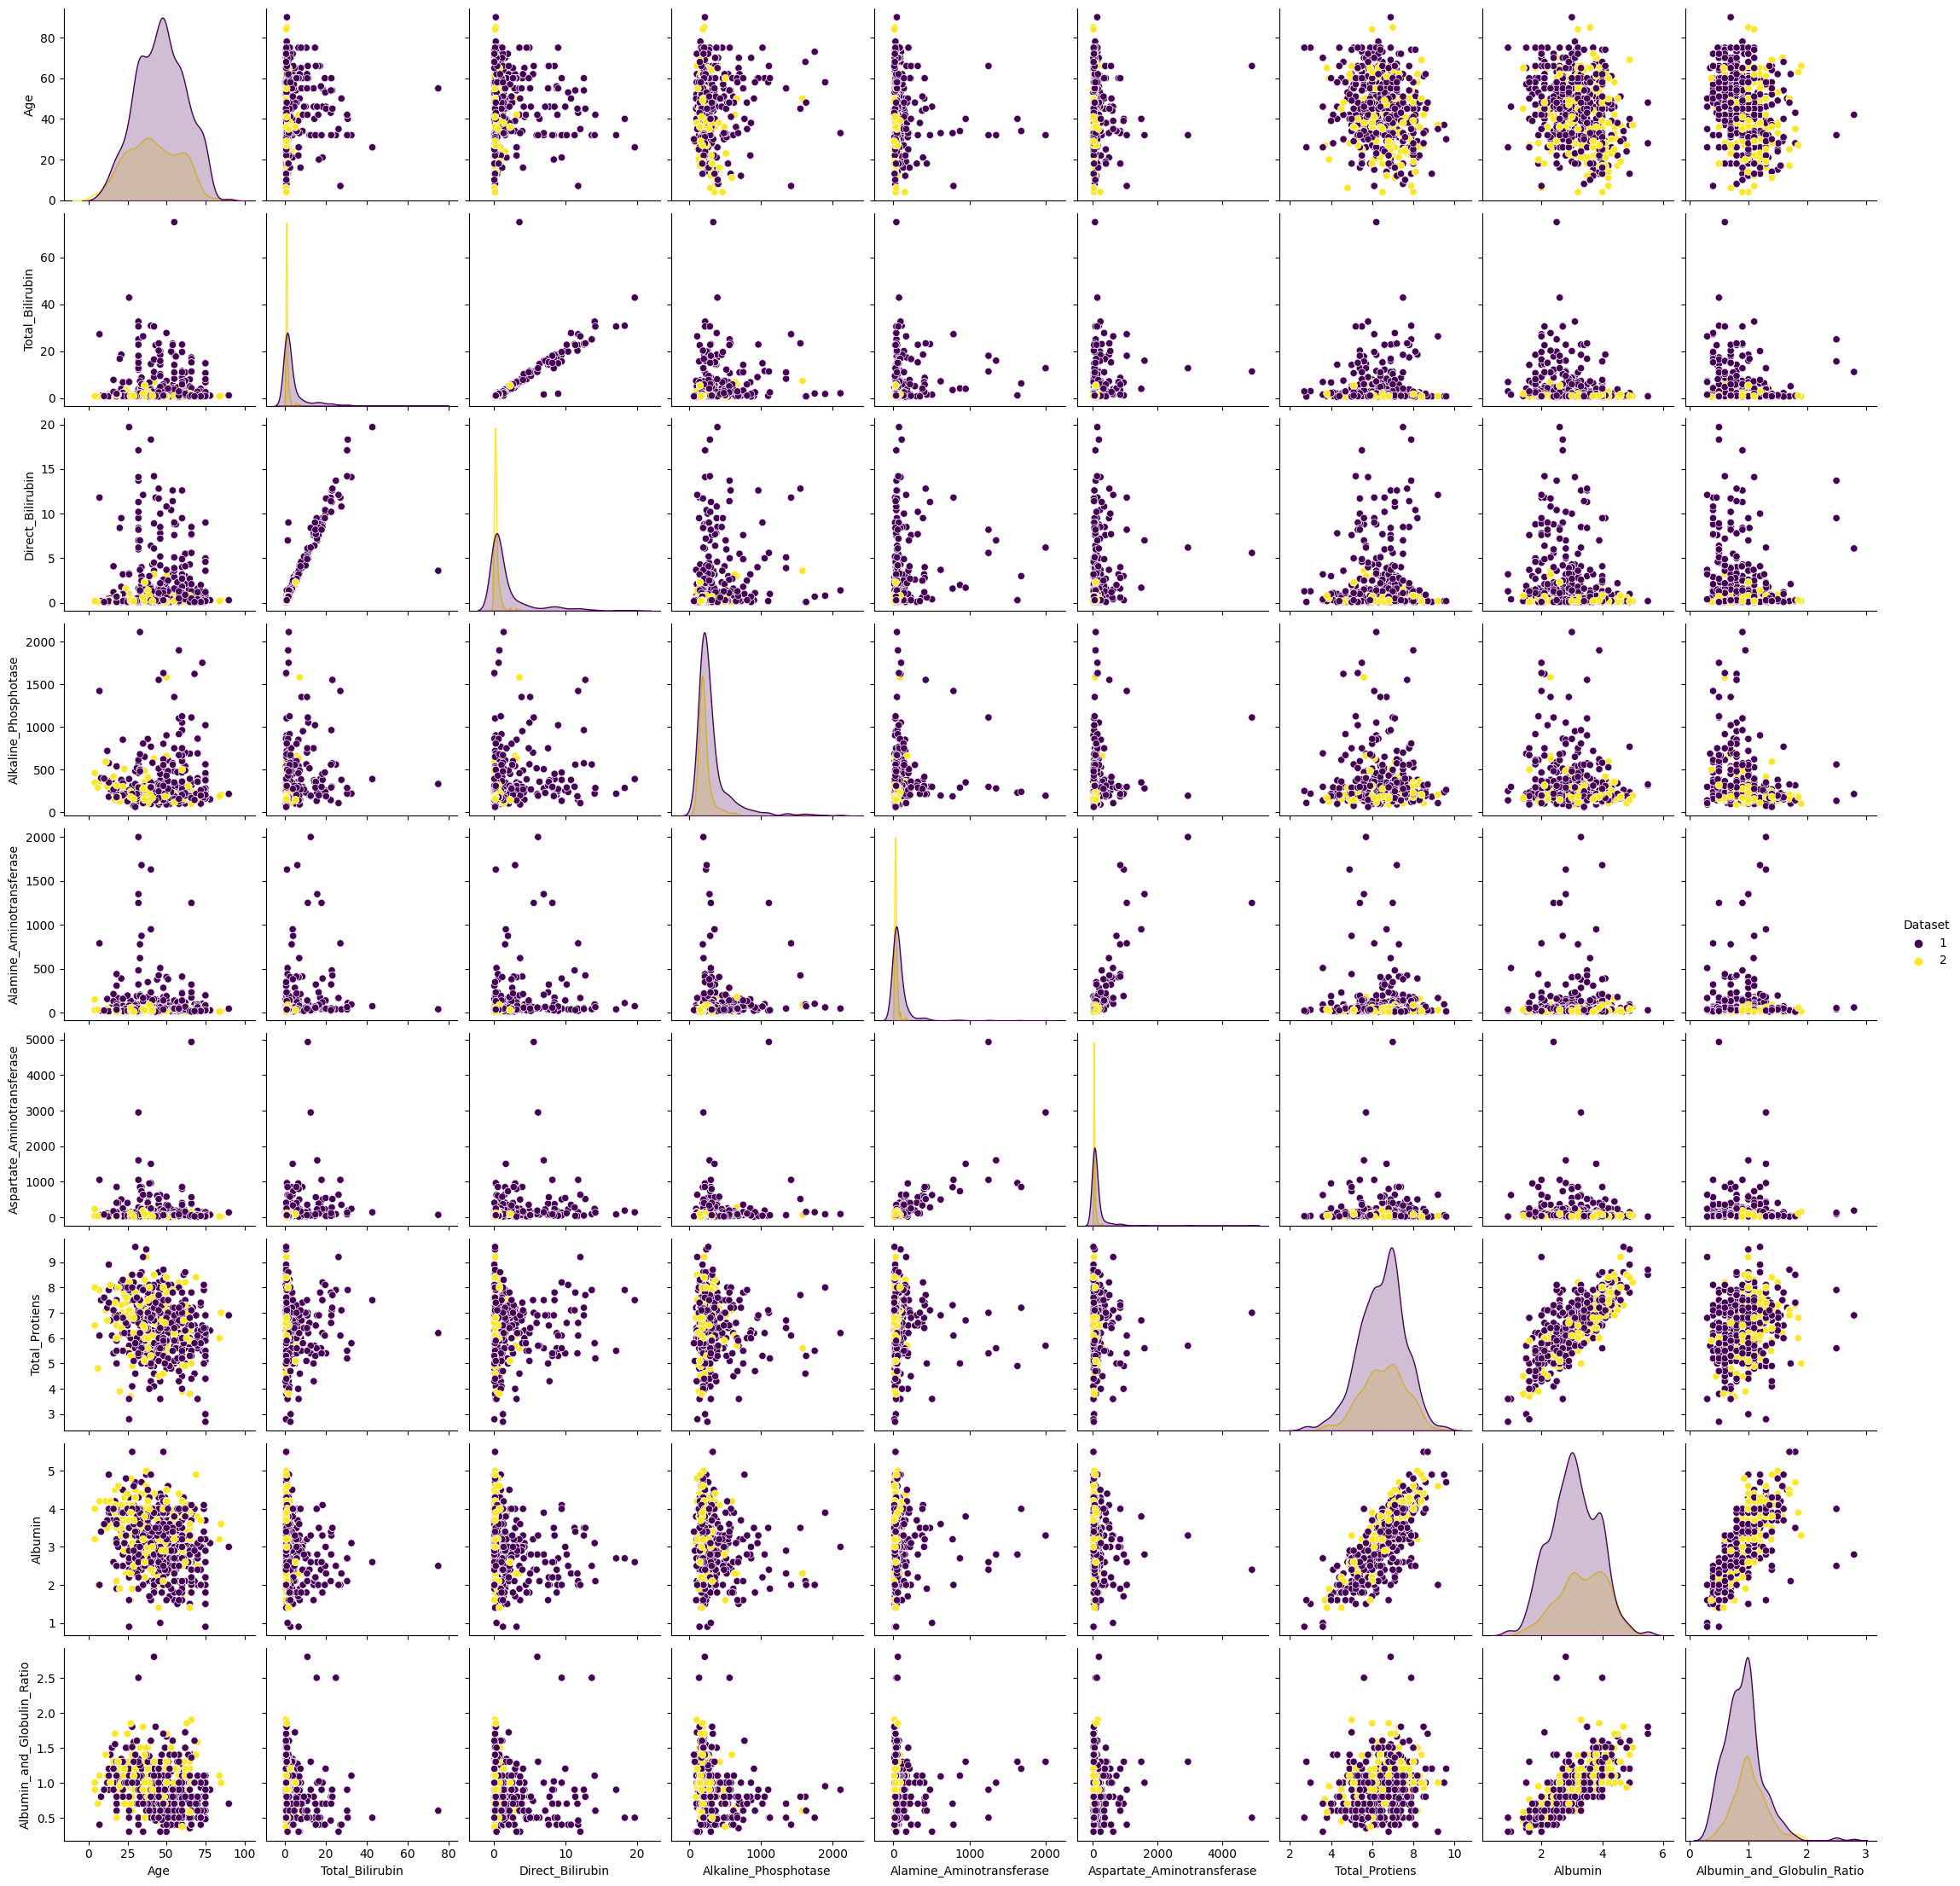

In [ ]:
sns.pairplot(df, hue='Dataset', palette='viridis')

Looking into univairate features

Lets look for Total Bilirubin and Direct Bilirubin

Normal results for a total bilirubin test are 1.2 milligrams per deciliter (mg/dL) for adults and usually 1 mg/dL for those under 18.
Normal results for direct bilirubin are generally 0.3 mg/dL.

Text(0, 0.5, 'Total Bilirubin')

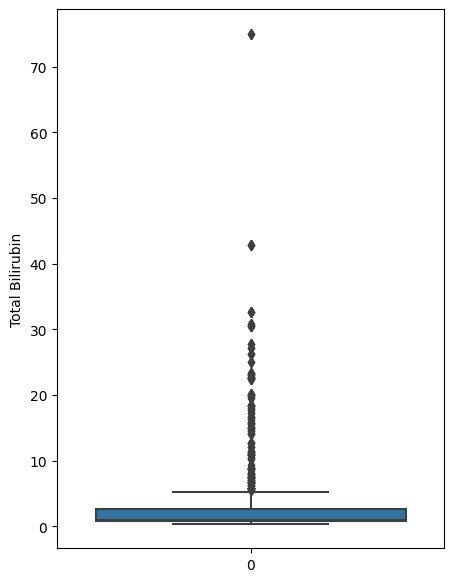

In [ ]:
fig = plt.figure(figsize=(5,7))
ax = sns.boxplot(data = df['Total_Bilirubin'],orient='v')
ax.set_ylabel("Total Bilirubin")


Text(0, 0.5, 'Direct Bilirubin')

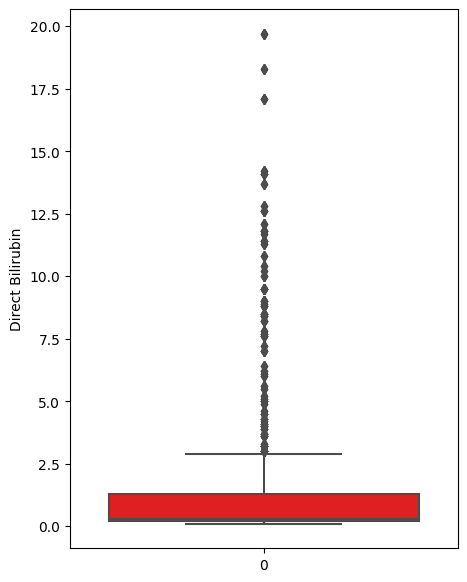

In [ ]:
fig = plt.figure(figsize=(5,7))
ax = sns.boxplot(data = df['Direct_Bilirubin'],color='Red',orient='v')
ax.set_ylabel("Direct Bilirubin")

<Axes: >

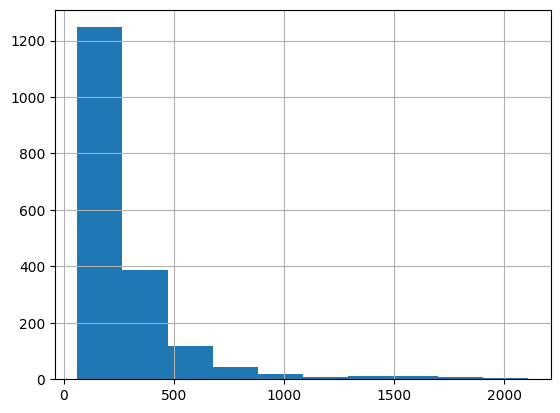

In [ ]:
df['Alkaline_Phosphotase'].hist()

<Axes: >

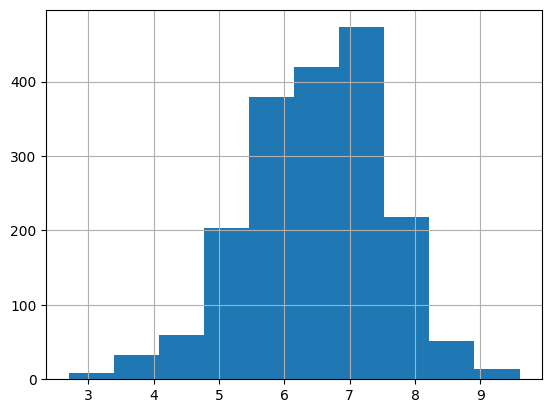

In [ ]:
df['Total_Protiens'].hist()

<Axes: >

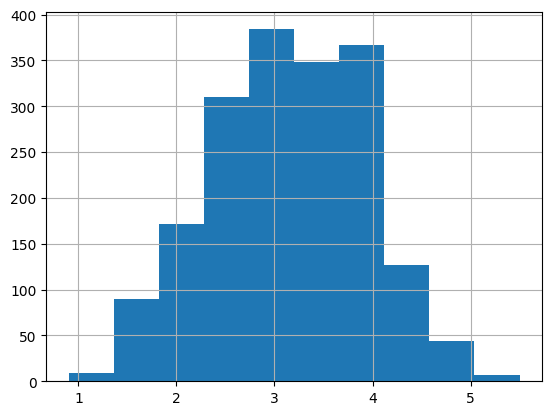

In [ ]:
df['Albumin'].hist()

<Axes: >

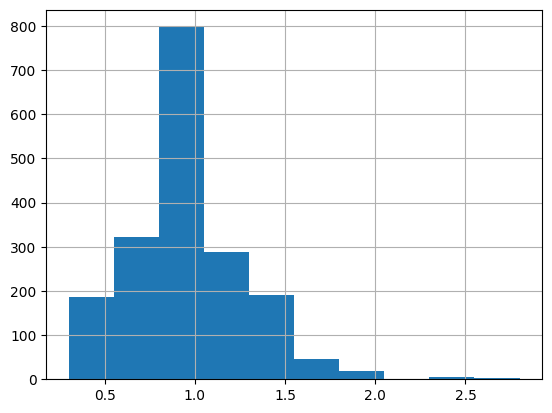

In [ ]:
df['Albumin_and_Globulin_Ratio'].hist()


Text(0.5, 0, 'Patient Condition')

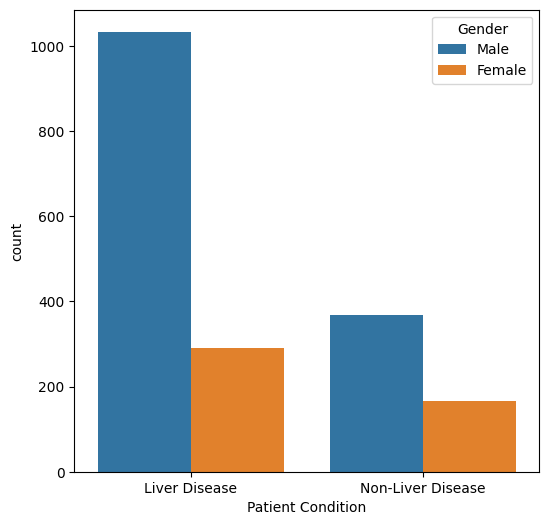

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x = df['Dataset'].apply(lambda x:'Liver Disease' if x == 1 else 'Non-Liver Disease'), hue=df['Gender'])
ax.set_xlabel('Patient Condition')

In [ ]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1853,35,Male,26.3,12.1,108,168,630,9.2,2.0,0.3,1
1854,30,Female,0.7,0.2,63,31,27,5.8,3.4,1.4,1
1855,29,Male,0.8,0.2,156,12,15,6.8,3.7,1.1,2
1856,48,Female,1.0,0.3,310,37,56,5.9,2.5,0.7,1
1857,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.0,2


Text(0, 0.5, 'Total_Proteins')

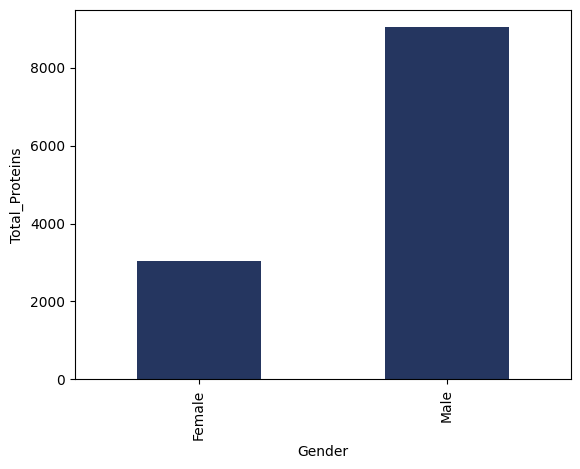

In [ ]:
df.groupby('Gender').sum()['Total_Protiens'].plot.bar(color='#253660').set_ylabel('Total_Proteins')

In [ ]:
#Creating Checkpoint
df2 = df.copy()

In [ ]:
df2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,32,Male,3.7,1.6,612,50,88,6.2,1.9,0.40,1
1,72,Male,0.7,0.2,185,16,22,7.3,3.7,1.00,2
2,75,Female,0.8,0.2,188,20,29,4.4,1.8,0.60,1
3,21,Male,3.9,1.8,150,36,27,6.8,3.9,1.34,1
4,18,Male,0.6,0.2,538,33,34,7.5,3.2,0.70,1


Label Encoding


In [ ]:
df2 = pd.get_dummies(data=df2,columns=['Gender','Dataset'], drop_first=True)
df2.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male,Dataset_2
0,32,3.7,1.6,612,50,88,6.2,1.9,0.40,1,0
1,72,0.7,0.2,185,16,22,7.3,3.7,1.00,1,1
2,75,0.8,0.2,188,20,29,4.4,1.8,0.60,0,0
3,21,3.9,1.8,150,36,27,6.8,3.9,1.34,1,0
4,18,0.6,0.2,538,33,34,7.5,3.2,0.70,1,0


In [ ]:
df2.rename(columns={'Dataset_2':'Have_Disease'},inplace=True)
df2 = df2[['Gender_Male', 'Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Have_Disease']]

In [ ]:
df2.head()

,Gender_Male,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Have_Disease
0,1,32,3.7,1.6,612,50,88,6.2,1.9,0.40,0
1,1,72,0.7,0.2,185,16,22,7.3,3.7,1.00,1
2,0,75,0.8,0.2,188,20,29,4.4,1.8,0.60,0
3,1,21,3.9,1.8,150,36,27,6.8,3.9,1.34,0
4,1,18,0.6,0.2,538,33,34,7.5,3.2,0.70,0


<Axes: >

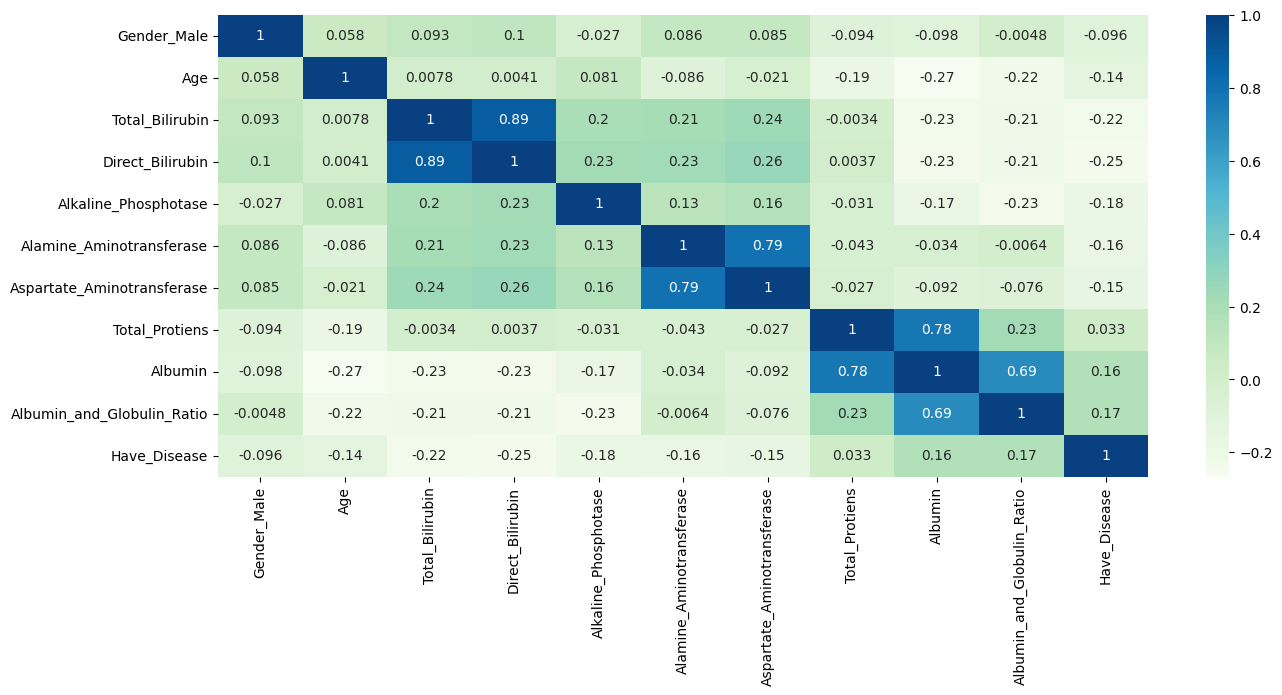

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df2.corr(),cmap='GnBu',annot=True)

In [ ]:
df3 = df2.drop(['Direct_Bilirubin','Aspartate_Aminotransferase','Albumin'], axis=1)

In [ ]:
df3['Have_Disease'].value_counts()

0    1323
1     535
Name: Have_Disease, dtype: int64

Here datasets conatins unbalanced Classes so we will try to resample our data to reduce the incorrectness.

In [ ]:
df3.describe(percentiles=[0.30,0.60,0.90])

,Gender_Male,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio,Have_Disease
count,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000
mean,0.754575,44.867600,3.339720,289.863832,79.295479,6.497255,0.944989,0.287944
std,0.430455,16.150634,6.294076,243.088010,177.897475,1.082503,0.316537,0.452927
min,0.000000,4.000000,0.400000,63.000000,10.000000,2.700000,0.300000,0.000000
30%,1.000000,35.000000,0.800000,182.000000,25.000000,6.000000,0.800000,0.000000
50%,1.000000,45.000000,1.000000,208.000000,35.000000,6.600000,0.930000,0.000000
60%,1.000000,49.000000,1.400000,232.000000,42.000000,6.900000,1.000000,0.000000
90%,1.000000,66.000000,8.000000,512.000000,140.000000,7.900000,1.300000,1.000000
max,1.000000,90.000000,75.000000,2110.000000,2000.000000,9.600000,2.800000,1.000000


Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#checkpoint
df4 = pd.concat([df3['Gender_Male'],pd.DataFrame(sc.fit_transform(df3.iloc[:,1:7])),df3['Have_Disease']], axis=1)
df4.columns = df3.columns
df4.head()

,Gender_Male,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio,Have_Disease
0,1,-0.796939,0.057257,1.325540,-0.164721,-0.274674,-1.722190,0
1,1,1.680411,-0.419510,-0.431498,-0.355893,0.741763,0.173836,1
2,0,1.866212,-0.403618,-0.419154,-0.333402,-1.937934,-1.090181,0
3,1,-1.478210,0.089041,-0.575518,-0.243439,0.279746,1.248251,0
4,1,-1.664011,-0.435403,1.021042,-0.260307,0.926570,-0.774177,0


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.1 MB/s eta 0:00:00


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score

In [ ]:
def ml_algorthims(data):
    fig, axes = plt.subplots(3, 3, figsize=(20, 25))
    print("::::::::::::::::::: Splitting the dataset into train and test ::::::::::")
    x = data.drop('Have_Disease', axis=1).values
    y = data.iloc[:, -1].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    print(f"X_Train : {x_train.shape}\t X_Test : {x_test.shape}\nY_Train : {y_train.shape}\t Y_Test : {y_test.shape}\n")
    print()

    print(" ::::::::::::::::: Random Forest Classifier :::::::::::::::::")
    rftree = RandomForestClassifier().fit(x_train, y_train)
    rftree_pred = rftree.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test, rftree_pred), annot=True, ax=axes[0, 0])
    ax.set_title("Random Forest Confusion Matrix")
    print(f'Accuracy : {accuracy_score(y_test,rftree_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,rftree_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,rftree_pred):0.2f}')
    print()

    print(" ::::::::::::::::: K-Nearest Neighbors :::::::::::::::::")
    knn = KNeighborsClassifier().fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, ax=axes[0, 1])
    ax.set_title("KNN Confusion Matrix")
    print(f'Accuracy : {accuracy_score(y_test,knn_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,knn_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,knn_pred):0.2f}')
    print()

    print(" ::::::::::::::::: Gradient Boosting Classifier :::::::::::::::::")
    gbc = GradientBoostingClassifier().fit(x_train, y_train)
    gbc_pred = gbc.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test, gbc_pred), annot=True, ax=axes[0, 2])
    ax.set_title("Gradient Boosting Confusion Matrix")
    print(f'Accuracy : {accuracy_score(y_test,gbc_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,gbc_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,gbc_pred):0.2f}')
    print()

    print(" ::::::::::::::::: Extreme Gradient Boosting Classifier :::::::::::::::::")
    xgb = XGBClassifier().fit(x_train, y_train)
    xgb_pred = xgb.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, ax=axes[1, 0])
    ax.set_title("XGBoost Confusion Matrix")
    print(f'Accuracy : {accuracy_score(y_test,xgb_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,xgb_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,xgb_pred):0.2f}')
    print()

    print(" ::::::::::::::::: Extra Tree Classifier :::::::::::::::::")
    etc = ExtraTreesClassifier().fit(x_train, y_train)
    etc_pred = etc.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test, etc_pred), annot=True, ax=axes[1, 1])
    ax.set_title("Extra Tree Confusion Matrix")
    print(f'Accuracy : {accuracy_score(y_test,etc_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,etc_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,etc_pred):0.2f}')
    print()

    print(" ::::::::::::::::: AdaBoost Classifier :::::::::::::::::")
    adb = AdaBoostClassifier().fit(x_train, y_train)
    adb_pred = adb.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test, adb_pred), annot=True, ax=axes[1, 2])
    ax.set_title("AdaBoost Confusion Matrix")
    print(f'Accuracy : {accuracy_score(y_test,adb_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,adb_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,adb_pred):0.2f}')
    print()

    print(" ::::::::::::::::: LogitBoost Classifier :::::::::::::::::")
    lgb = LGBMClassifier(boosting_type='goss', n_estimators=100).fit(x_train, y_train)
    lgb_pred = lgb.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test, lgb_pred), annot=True, ax=axes[2, 0])
    ax.set_title("LogitBoost Confusion Matrix")
    print(f'Accuracy : {accuracy_score(y_test,lgb_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,lgb_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,lgb_pred):0.2f}')
    print()

    print(" ::::::::::::::::: CatBoost Classifier :::::::::::::::::")
    cat = CatBoostClassifier().fit(x_train, y_train)
    cat_pred = cat.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test, cat_pred), annot=True, ax=axes[2, 1])
    ax.set_title("CatBoost Confusion Matrix")
    print(f'Accuracy : {accuracy_score(y_test,cat_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,cat_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,cat_pred):0.2f}')
    print()

    print(" ::::::::::::::::: Voting Classifier :::::::::::::::::")
    classifiers = [
                  ('ada', AdaBoostClassifier()),
                  ('extra', ExtraTreesClassifier()),
                  ('cat', CatBoostClassifier())]
    vc = VotingClassifier(estimators=classifiers).fit(x_train, y_train)
    vc_pred = vc.predict(x_test)
    ax = sns.heatmap(confusion_matrix(y_test, vc_pred), annot=True, ax=axes[2, 2])
    ax.set_title("Voting Confusion Matrix")
    print(f'Accuracy : {accuracy_score(y_test,vc_pred):0.2f}')
    print(f'Precision : {precision_score(y_test,vc_pred):0.2f}')
    print(f'Recall : {recall_score(y_test,vc_pred):0.2f}')
    print()



::::::::::::::::::: Splitting the dataset into train and test ::::::::::
X_Train : (1486, 7)	 X_Test : (372, 7)
Y_Train : (1486,)	 Y_Test : (372,)


 ::::::::::::::::: Random Forest Classifier :::::::::::::::::
Accuracy : 0.99
Precision : 0.97
Recall : 1.00

 ::::::::::::::::: K-Nearest Neighbors :::::::::::::::::
Accuracy : 0.76
Precision : 0.56
Recall : 0.66

 ::::::::::::::::: Gradient Boosting Classifier :::::::::::::::::
Accuracy : 0.86
Precision : 0.78
Recall : 0.69

 ::::::::::::::::: Extreme Gradient Boosting Classifier :::::::::::::::::
Accuracy : 0.99
Precision : 0.97
Recall : 1.00

 ::::::::::::::::: Extra Tree Classifier :::::::::::::::::
Accuracy : 1.00
Precision : 1.00
Recall : 1.00

 ::::::::::::::::: AdaBoost Classifier :::::::::::::::::
Accuracy : 0.79
Precision : 0.63
Recall : 0.58

 ::::::::::::::::: LogitBoost Classifier :::::::::::::::::
Accuracy : 0.98
Precision : 0.97
Recall : 0.97

 ::::::::::::::::: CatBoost Classifier :::::::::::::::::
Learning rate set to 0.0

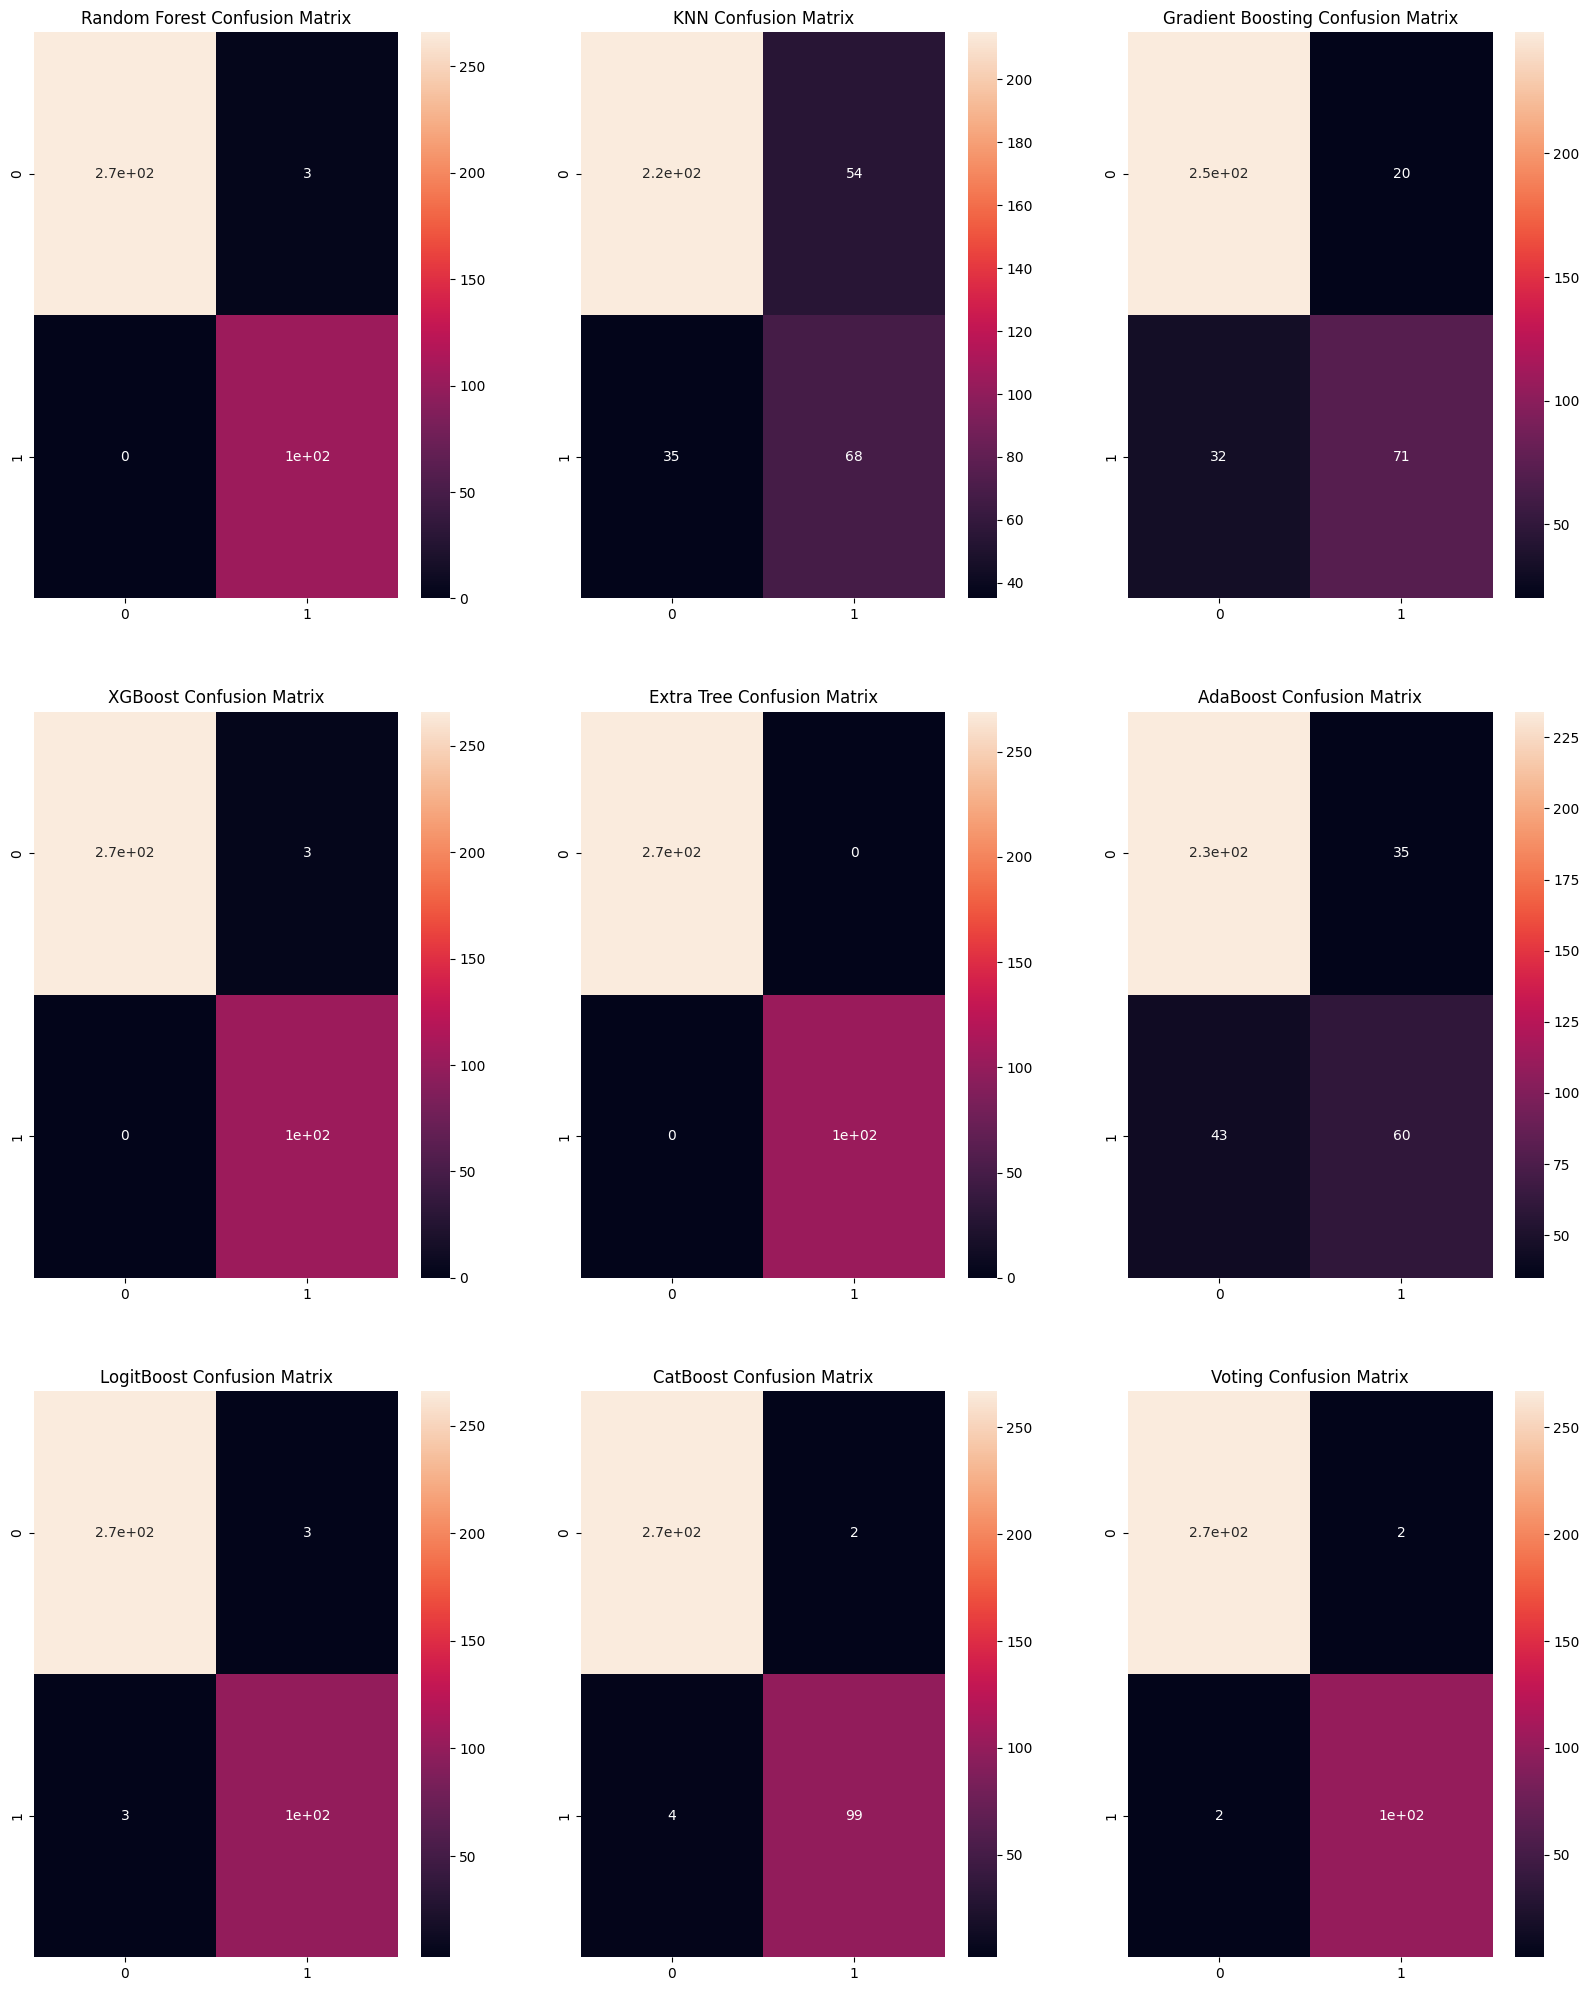

In [ ]:
ml_algorthims(df4)

Balancing the imbalanced Dataset

1. Undersampling the majority class

In [ ]:
df_class_0 = df4[df4['Have_Disease'] == 0].copy()
df_class_1 = df4[df4['Have_Disease'] == 1].copy()
undersample = df_class_0.sample(df_class_1.shape[0]).reset_index(drop=True)

::::::::::::::::::: Splitting the dataset into train and test ::::::::::
X_Train : (856, 7)	 X_Test : (214, 7)
Y_Train : (856,)	 Y_Test : (214,)


 ::::::::::::::::: Random Forest Classifier :::::::::::::::::
Accuracy : 0.94
Precision : 0.88
Recall : 1.00

 ::::::::::::::::: K-Nearest Neighbors :::::::::::::::::
Accuracy : 0.68
Precision : 0.61
Recall : 0.83

 ::::::::::::::::: Gradient Boosting Classifier :::::::::::::::::
Accuracy : 0.83
Precision : 0.75
Recall : 0.94

 ::::::::::::::::: Extreme Gradient Boosting Classifier :::::::::::::::::
Accuracy : 0.95
Precision : 0.91
Recall : 1.00

 ::::::::::::::::: Extra Tree Classifier :::::::::::::::::
Accuracy : 0.94
Precision : 0.88
Recall : 1.00

 ::::::::::::::::: AdaBoost Classifier :::::::::::::::::
Accuracy : 0.72
Precision : 0.65
Recall : 0.85

 ::::::::::::::::: LogitBoost Classifier :::::::::::::::::
Accuracy : 0.89
Precision : 0.84
Recall : 0.95

 ::::::::::::::::: CatBoost Classifier :::::::::::::::::
Learning rate set to 0.009

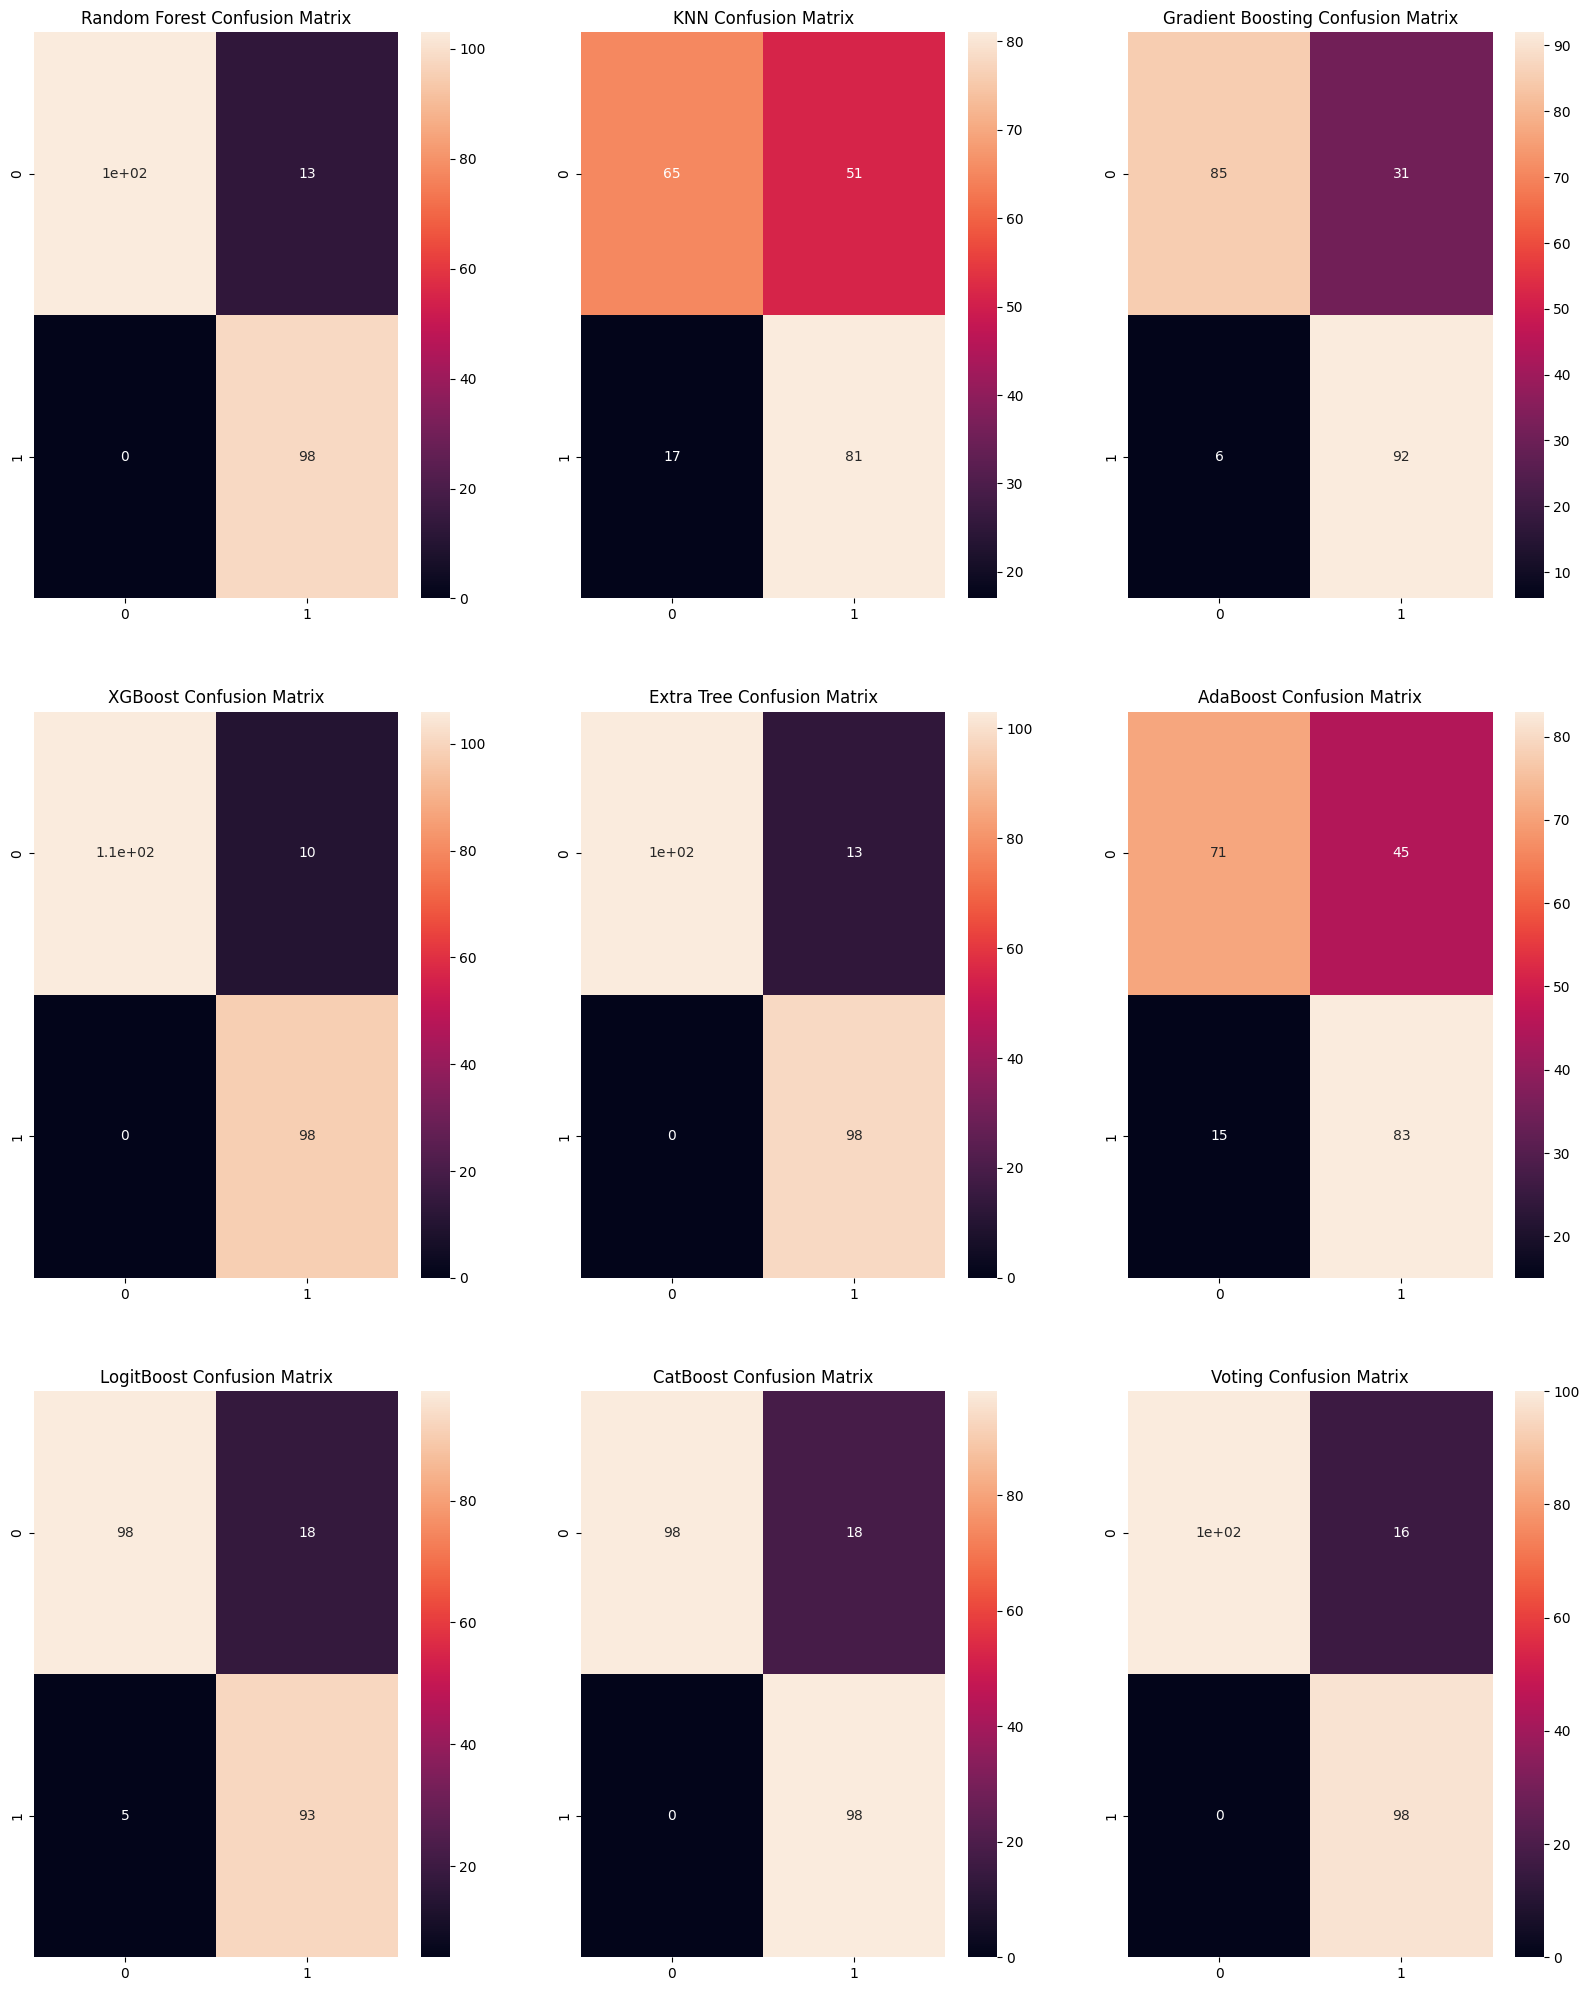

In [ ]:
ml_algorthims(pd.concat([undersample,df_class_1],axis=0))

2. Oversampling minority class

In [ ]:
oversample = df_class_1.sample(df_class_0.shape[0], replace=True)

::::::::::::::::::: Splitting the dataset into train and test ::::::::::
X_Train : (2116, 7)	 X_Test : (530, 7)
Y_Train : (2116,)	 Y_Test : (530,)


 ::::::::::::::::: Random Forest Classifier :::::::::::::::::
Accuracy : 1.00
Precision : 1.00
Recall : 1.00

 ::::::::::::::::: K-Nearest Neighbors :::::::::::::::::
Accuracy : 0.89
Precision : 0.83
Recall : 0.99

 ::::::::::::::::: Gradient Boosting Classifier :::::::::::::::::
Accuracy : 0.90
Precision : 0.84
Recall : 0.99

 ::::::::::::::::: Extreme Gradient Boosting Classifier :::::::::::::::::
Accuracy : 1.00
Precision : 1.00
Recall : 1.00

 ::::::::::::::::: Extra Tree Classifier :::::::::::::::::
Accuracy : 0.99
Precision : 0.99
Recall : 1.00

 ::::::::::::::::: AdaBoost Classifier :::::::::::::::::
Accuracy : 0.80
Precision : 0.76
Recall : 0.88

 ::::::::::::::::: LogitBoost Classifier :::::::::::::::::
Accuracy : 0.99
Precision : 0.98
Recall : 1.00

 ::::::::::::::::: CatBoost Classifier :::::::::::::::::
Learning rate set to 0.0

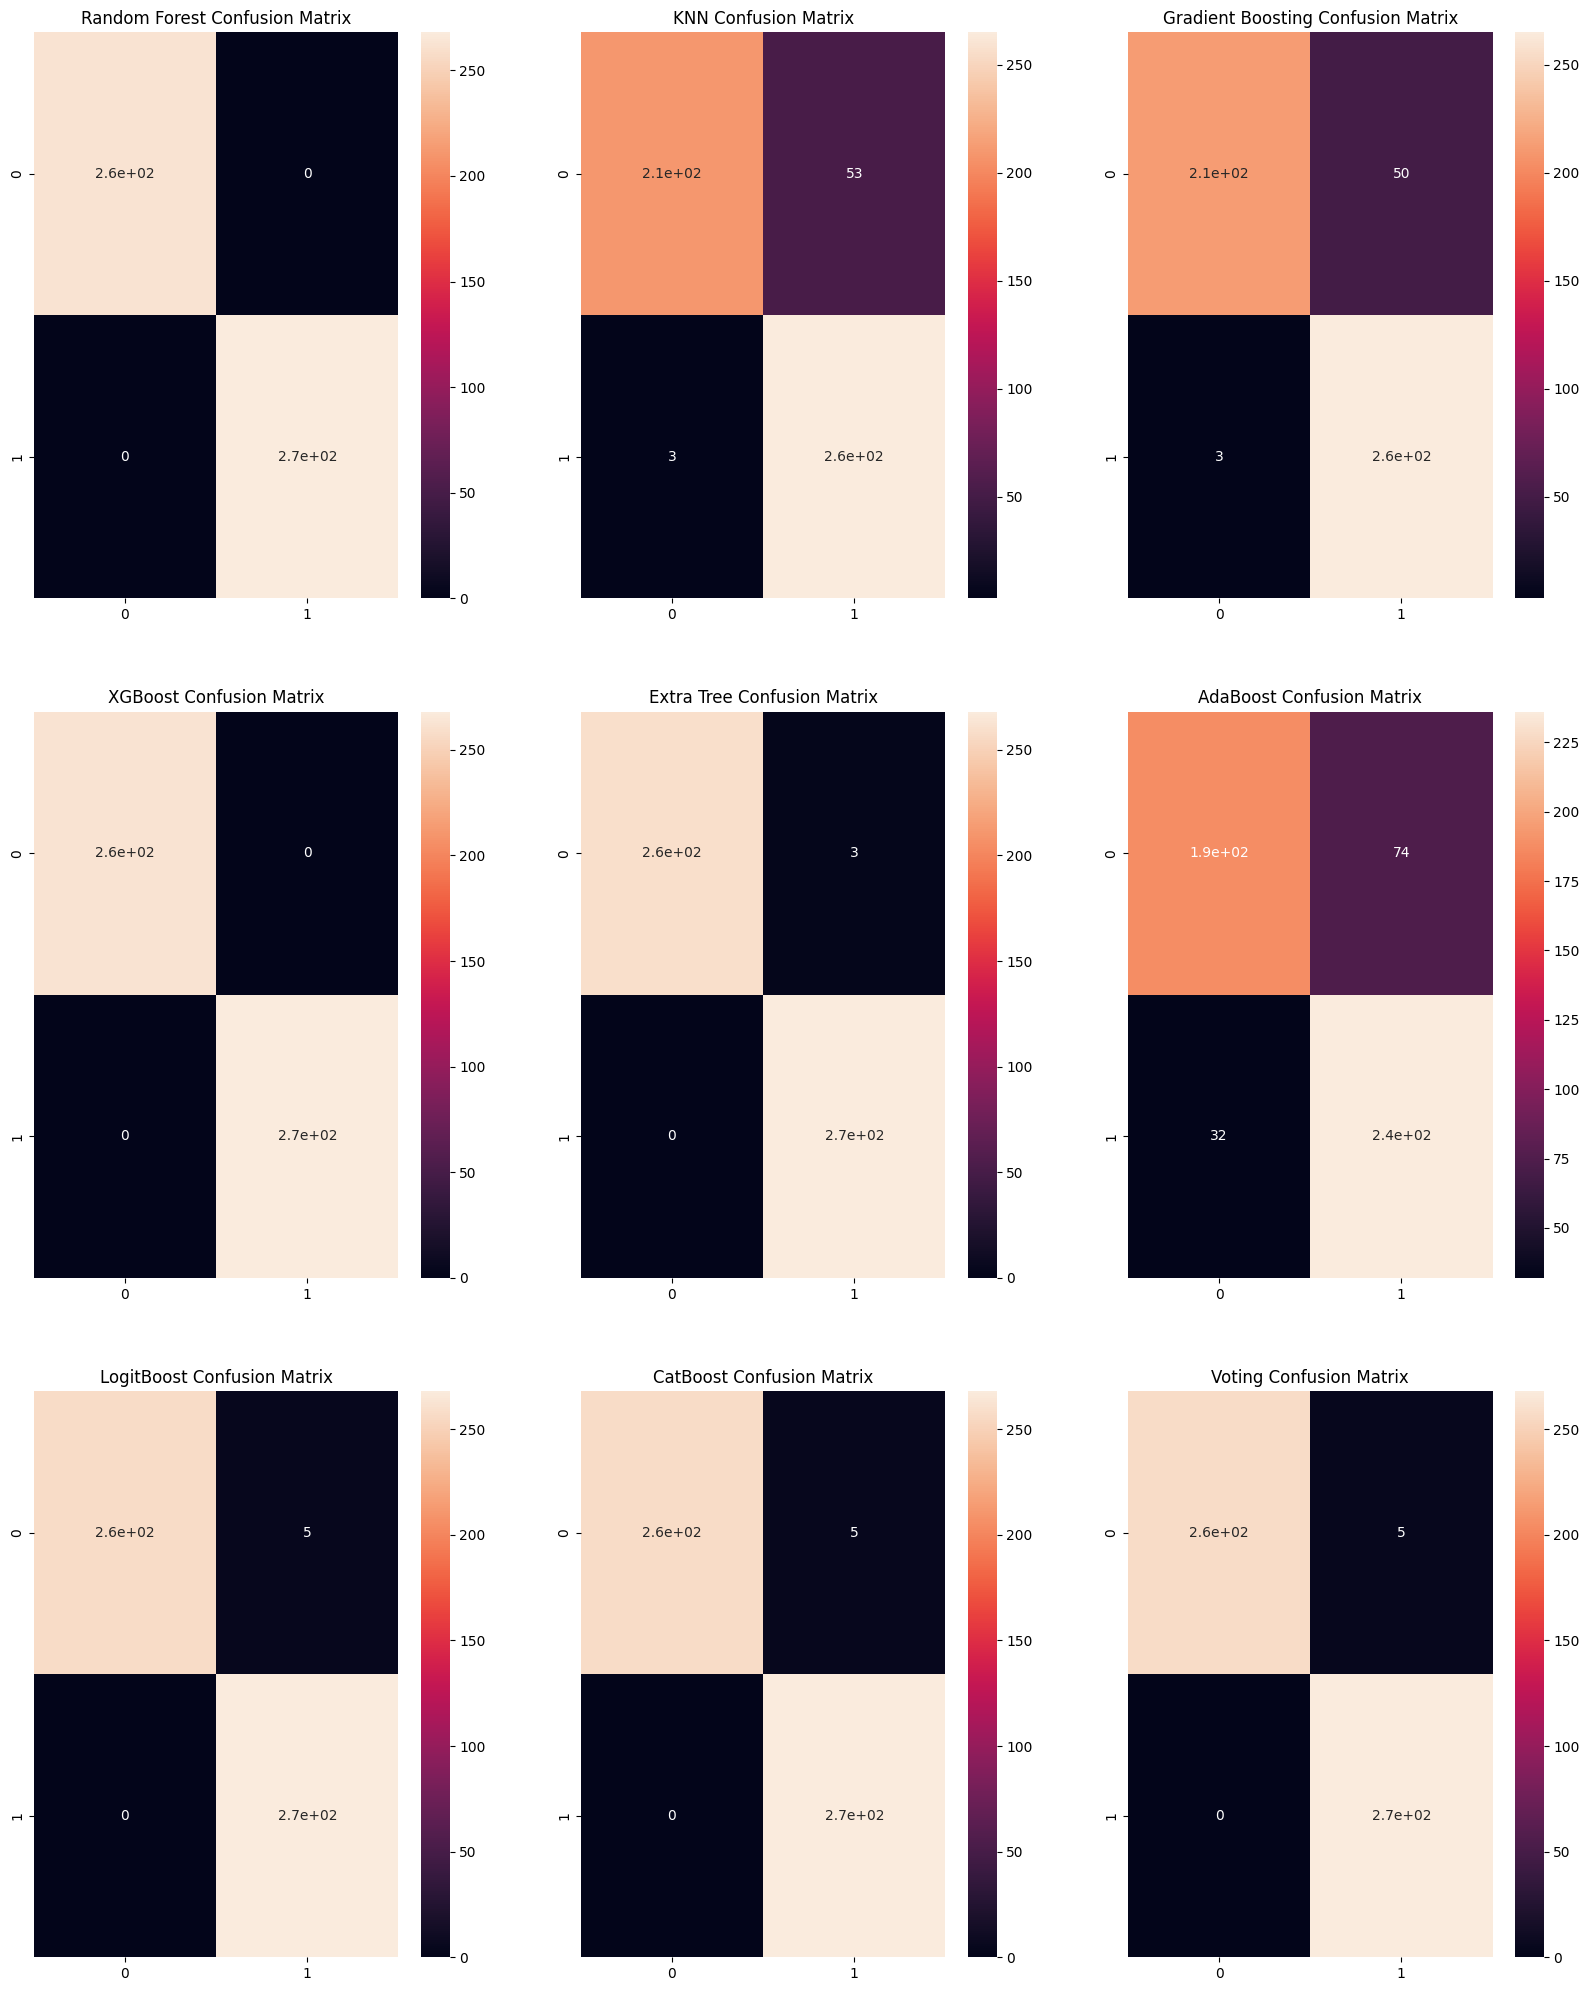

In [ ]:
ml_algorthims(pd.concat([oversample,df_class_0],axis=0))

3.SMOTE(Synthetic Minority Oversampling Techinque)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(df4.drop('Have_Disease', axis=1), df4['Have_Disease'])

In [ ]:
nd = pd.concat([pd.DataFrame(x_sm),pd.DataFrame(y_sm)],axis=1)
nd.columns = df4.columns

::::::::::::::::::: Splitting the dataset into train and test ::::::::::
X_Train : (2116, 7)	 X_Test : (530, 7)
Y_Train : (2116,)	 Y_Test : (530,)


 ::::::::::::::::: Random Forest Classifier :::::::::::::::::
Accuracy : 1.00
Precision : 1.00
Recall : 1.00

 ::::::::::::::::: K-Nearest Neighbors :::::::::::::::::
Accuracy : 0.90
Precision : 0.84
Recall : 0.99

 ::::::::::::::::: Gradient Boosting Classifier :::::::::::::::::
Accuracy : 0.88
Precision : 0.82
Recall : 0.98

 ::::::::::::::::: Extreme Gradient Boosting Classifier :::::::::::::::::
Accuracy : 1.00
Precision : 1.00
Recall : 1.00

 ::::::::::::::::: Extra Tree Classifier :::::::::::::::::
Accuracy : 1.00
Precision : 1.00
Recall : 1.00

 ::::::::::::::::: AdaBoost Classifier :::::::::::::::::
Accuracy : 0.81
Precision : 0.75
Recall : 0.92

 ::::::::::::::::: LogitBoost Classifier :::::::::::::::::
Accuracy : 0.99
Precision : 0.98
Recall : 1.00

 ::::::::::::::::: CatBoost Classifier :::::::::::::::::
Learning rate set to 0.0

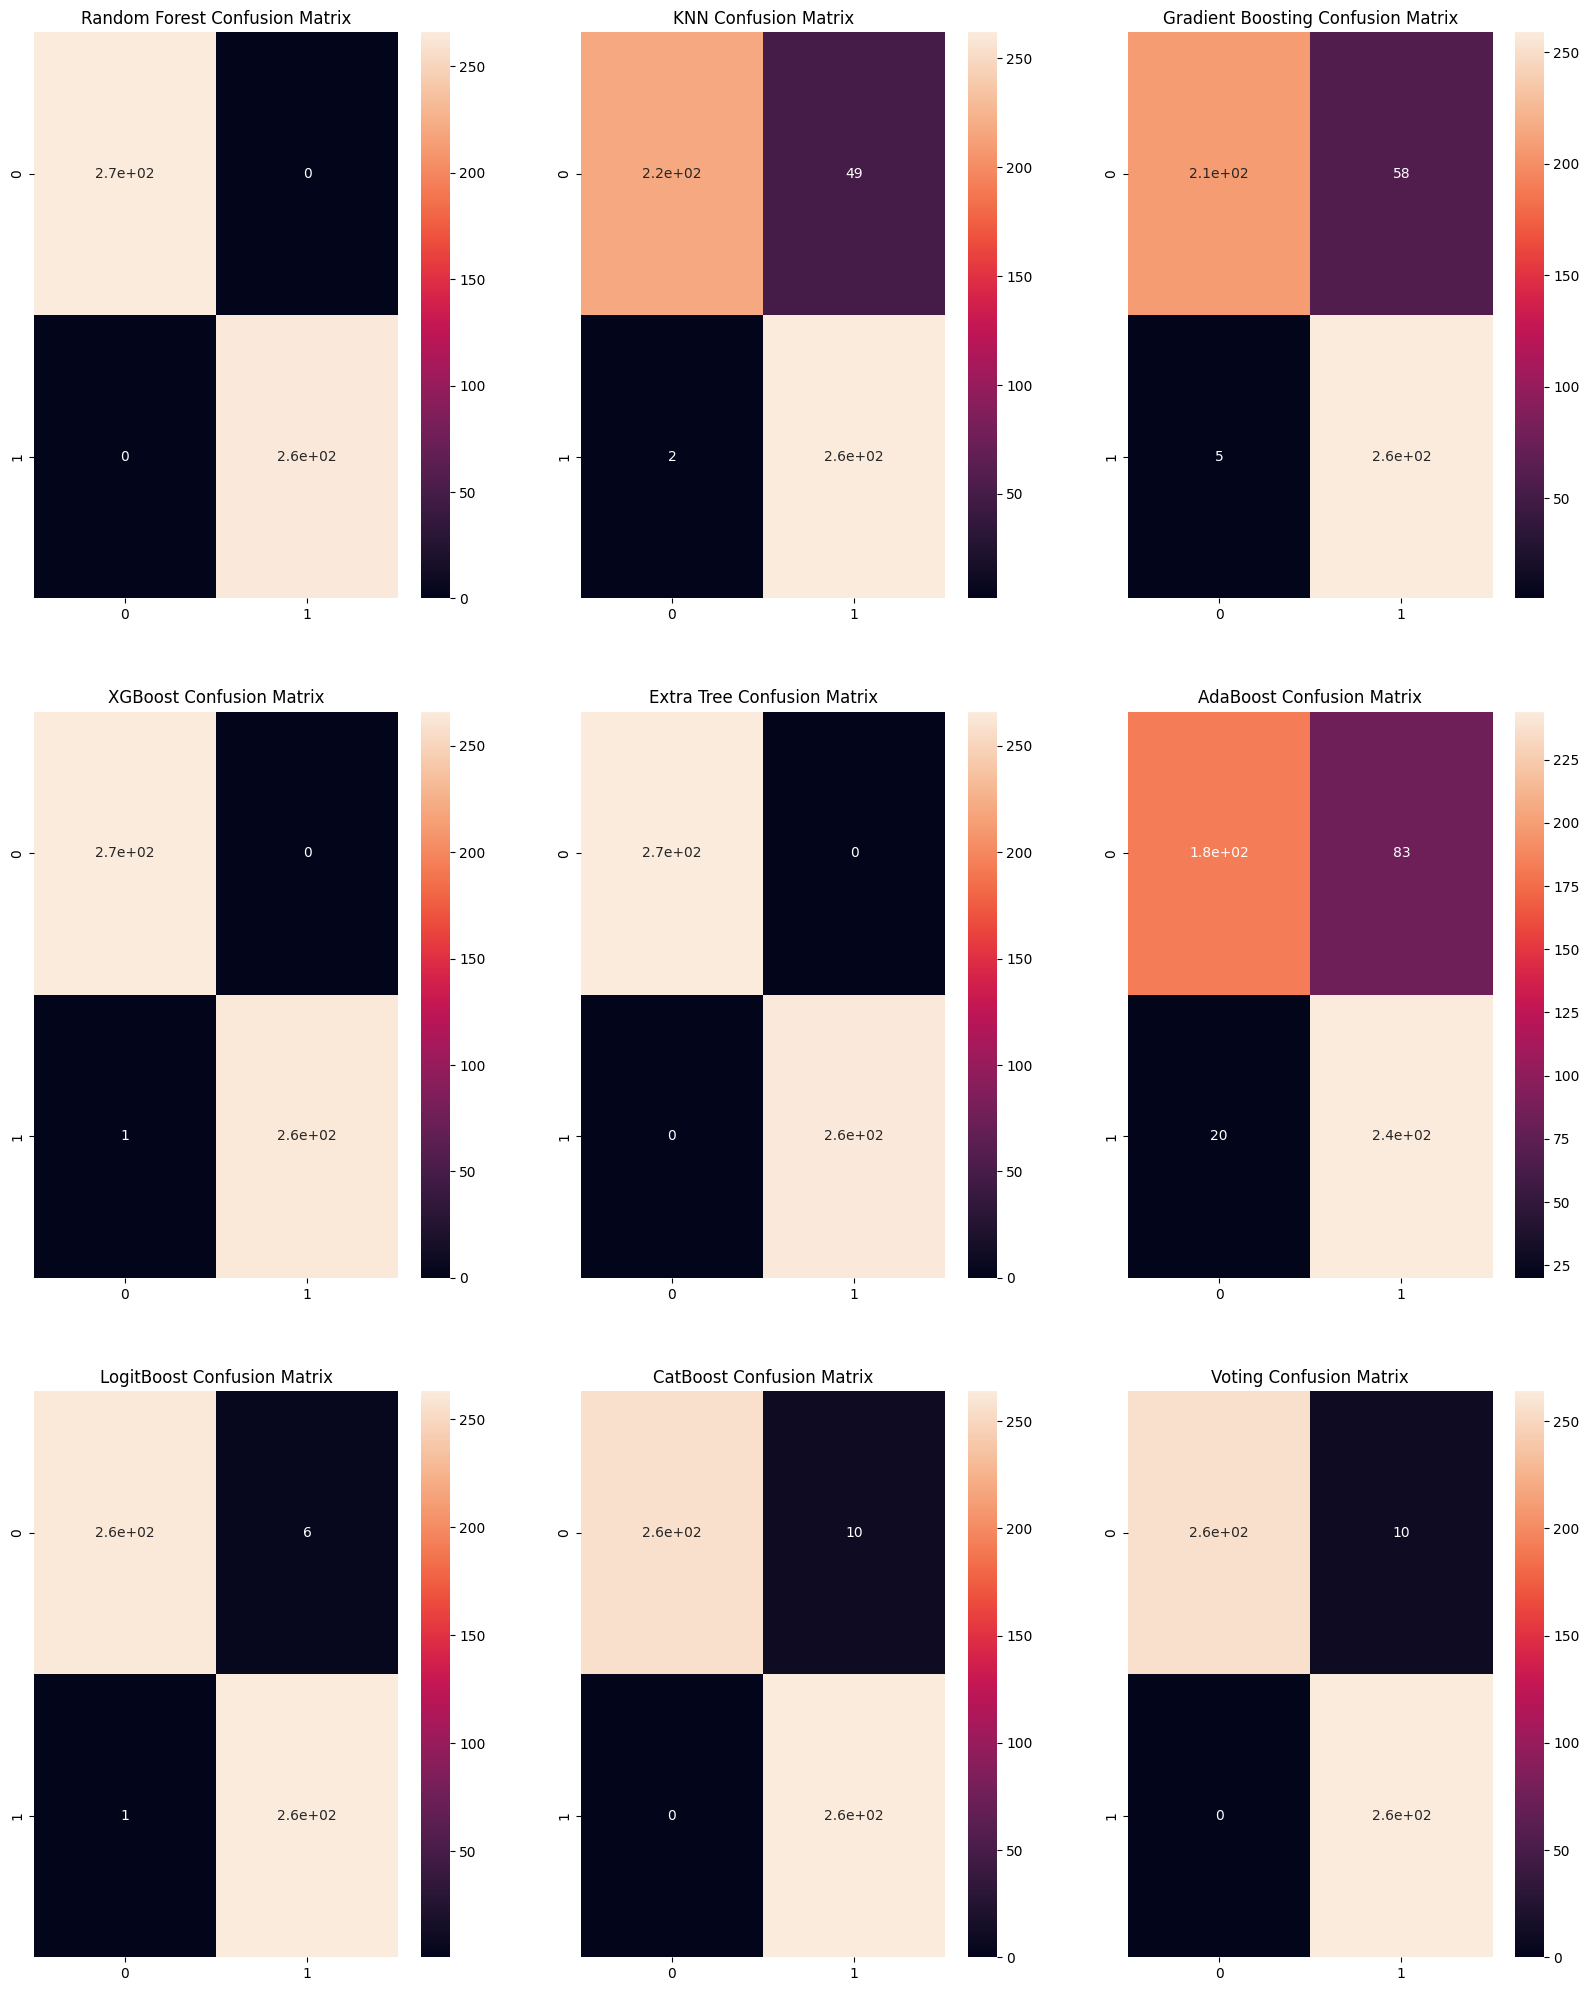

In [ ]:
ml_algorthims(nd)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
x_sm, y_sm = smote.fit_resample(df4.drop('Have_Disease', axis=1), df4['Have_Disease'])


In [ ]:
nd = pd.concat([pd.DataFrame(x_sm),pd.DataFrame(y_sm)],axis=1)
nd.columns = df4.columns

::::::::::::::::::: Splitting the dataset into train and test ::::::::::
X_Train : (2116, 7)	 X_Test : (530, 7)
Y_Train : (2116,)	 Y_Test : (530,)


 ::::::::::::::::: Random Forest Classifier :::::::::::::::::
Accuracy : 1.00
Precision : 1.00
Recall : 1.00

 ::::::::::::::::: K-Nearest Neighbors :::::::::::::::::
Accuracy : 0.91
Precision : 0.85
Recall : 1.00

 ::::::::::::::::: Gradient Boosting Classifier :::::::::::::::::
Accuracy : 0.86
Precision : 0.80
Recall : 0.95

 ::::::::::::::::: Extreme Gradient Boosting Classifier :::::::::::::::::
Accuracy : 1.00
Precision : 1.00
Recall : 1.00

 ::::::::::::::::: Extra Tree Classifier :::::::::::::::::
Accuracy : 1.00
Precision : 1.00
Recall : 1.00

 ::::::::::::::::: AdaBoost Classifier :::::::::::::::::
Accuracy : 0.78
Precision : 0.74
Recall : 0.86

 ::::::::::::::::: LogitBoost Classifier :::::::::::::::::
Accuracy : 0.99
Precision : 0.98
Recall : 1.00

 ::::::::::::::::: CatBoost Classifier :::::::::::::::::
Learning rate set to 0.0

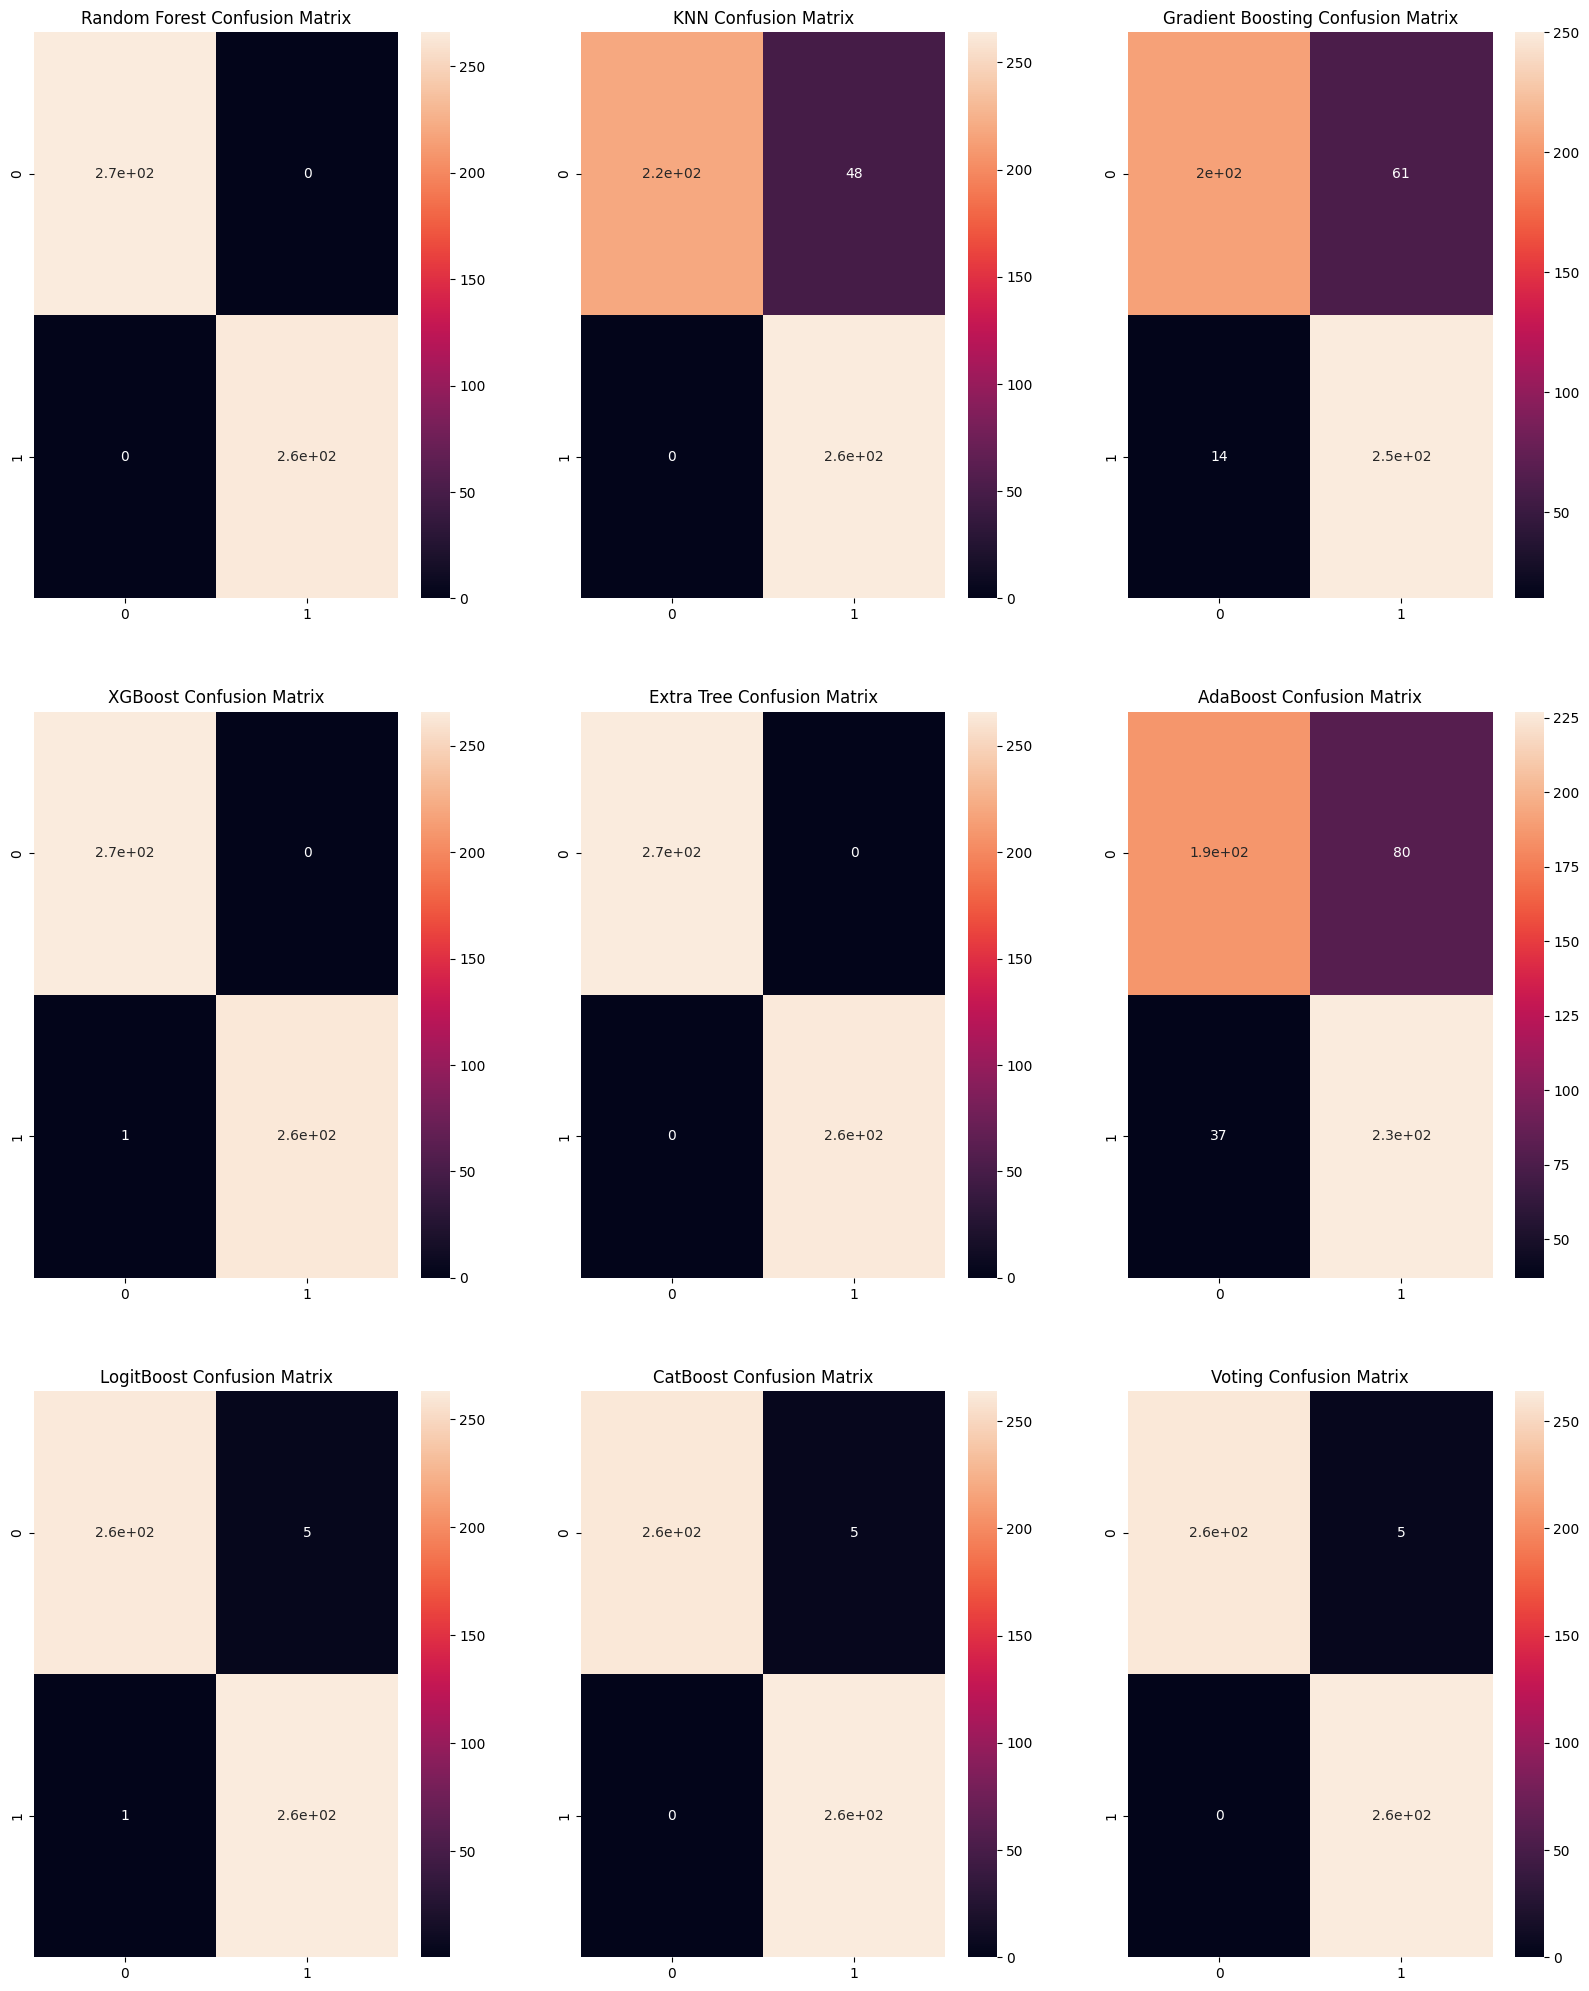

In [ ]:
ml_algorthims(nd)